In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
import folium 
from geopy.geocoders import Nominatim
from tqdm import tqdm
import geopandas as gpd
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from scipy.stats import skew, kurtosis

#pd.set_option('display.max_rows', None)

In [3]:
#df = pd.read_csv('C:/Users/steph/data_sci_masters/mining/data/United States (1).csv')
df = pd.read_csv('C:/Users/steph/data_sci_masters/mining/data/selected_features.csv')

In [4]:
df

,TRACTCE,EPL_RENTER,EPL_DSLPM,EPL_UNEMP,EPL_TSD,EPL_PARK,COUNTYFP,EPL_MOBILE,EPL_DISABL,F_BPHIGH,SPL_EJI,EPL_ROAD,EPL_IMPWTR,STATEFP,EPL_AGE17,EPL_OZONE,EPL_HOUAGE,EPL_TRI,EPL_AGE65,EPL_MINRTY
0,20100,0.3594,0.3242,0.2275,0.0,0.7314,1,0.8763,0.8886,1.0,1.1229,0.5033,0.0000,1,0.4069,0.0,0.2748,0.5940,0.3509,0.3243
1,20200,0.5857,0.3551,0.4444,0.0,0.5233,1,0.5741,0.4891,1.0,1.9108,0.2669,0.0000,1,0.4497,0.0,0.6692,0.6609,0.4278,0.7564
2,20300,0.5589,0.4441,0.3157,0.0,0.5363,1,0.5589,0.8278,1.0,1.6226,0.7371,0.0000,1,0.5684,0.0,0.5239,0.5157,0.5203,0.5537
3,20400,0.3025,0.5618,0.2712,0.0,0.7610,1,0.0000,0.8170,1.0,1.1659,0.7666,0.0000,1,0.2563,0.0,0.6996,0.3978,0.8953,0.2092
4,20500,0.7543,0.6210,0.2569,0.0,1.0000,1,0.4399,0.7440,0.0,0.9289,0.6779,0.0000,1,0.7185,0.0,0.0634,0.4588,0.3858,0.4921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72328,200,0.2370,0.0005,0.4859,0.0,0.8070,43,0.9037,0.6774,0.0,0.8739,0.2253,0.1771,56,0.4796,0.0,0.4117,0.2889,0.7562,0.2150
72329,301,0.5049,0.0383,0.1726,0.0,1.0000,43,0.6849,0.4603,0.0,0.8940,0.7666,0.0000,56,0.6831,0.0,0.9463,0.8577,0.8412,0.4817
72330,302,0.3107,0.0178,0.4585,0.0,1.0000,43,0.6355,0.6597,1.0,1.2492,0.7563,0.0000,56,0.8460,0.0,0.7267,0.6074,0.7859,0.3305
72331,951100,0.1797,0.0178,0.1858,0.0,0.8262,45,0.9311,0.7152,0.0,0.9359,0.2314,0.1450,56,0.2510,0.0,0.3355,0.2905,0.7376,0.1191


In [5]:
df = df.select_dtypes(include=['float64', 'int64'])

In [7]:
df = df.drop(['STATEFP', 'COUNTYFP', 'TRACTCE'], axis=1)

In [8]:
df

,EPL_RENTER,EPL_DSLPM,EPL_UNEMP,EPL_TSD,EPL_PARK,EPL_MOBILE,EPL_DISABL,F_BPHIGH,SPL_EJI,EPL_ROAD,EPL_IMPWTR,EPL_AGE17,EPL_OZONE,EPL_HOUAGE,EPL_TRI,EPL_AGE65,EPL_MINRTY
0,0.3594,0.3242,0.2275,0.0,0.7314,0.8763,0.8886,1.0,1.1229,0.5033,0.0000,0.4069,0.0,0.2748,0.5940,0.3509,0.3243
1,0.5857,0.3551,0.4444,0.0,0.5233,0.5741,0.4891,1.0,1.9108,0.2669,0.0000,0.4497,0.0,0.6692,0.6609,0.4278,0.7564
2,0.5589,0.4441,0.3157,0.0,0.5363,0.5589,0.8278,1.0,1.6226,0.7371,0.0000,0.5684,0.0,0.5239,0.5157,0.5203,0.5537
3,0.3025,0.5618,0.2712,0.0,0.7610,0.0000,0.8170,1.0,1.1659,0.7666,0.0000,0.2563,0.0,0.6996,0.3978,0.8953,0.2092
4,0.7543,0.6210,0.2569,0.0,1.0000,0.4399,0.7440,0.0,0.9289,0.6779,0.0000,0.7185,0.0,0.0634,0.4588,0.3858,0.4921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72328,0.2370,0.0005,0.4859,0.0,0.8070,0.9037,0.6774,0.0,0.8739,0.2253,0.1771,0.4796,0.0,0.4117,0.2889,0.7562,0.2150
72329,0.5049,0.0383,0.1726,0.0,1.0000,0.6849,0.4603,0.0,0.8940,0.7666,0.0000,0.6831,0.0,0.9463,0.8577,0.8412,0.4817
72330,0.3107,0.0178,0.4585,0.0,1.0000,0.6355,0.6597,1.0,1.2492,0.7563,0.0000,0.8460,0.0,0.7267,0.6074,0.7859,0.3305
72331,0.1797,0.0178,0.1858,0.0,0.8262,0.9311,0.7152,0.0,0.9359,0.2314,0.1450,0.2510,0.0,0.3355,0.2905,0.7376,0.1191


In [ ]:

# skewness = df.apply(skew)
# kurtosis_vals = df.apply(kurtosis)

# # Combine results into a DataFrame for easy inspection
# normality_measures = pd.DataFrame({
#     'Skewness': skewness,
#     'Kurtosis': kurtosis_vals
# })

# # Display the results
# print(normality_measures)

# # Check if the skewness and kurtosis are within the desired range
# skew_ok = (skewness >= -1) & (skewness <= 1)
# kurtosis_ok = (kurtosis_vals >= 2) & (kurtosis_vals <= 4)  # Normal kurtosis is around 3

# # Identify columns that don't meet normality criteria
# non_normal_columns = normality_measures[~(skew_ok & kurtosis_ok)]

# print("Non-normal features:")
# print(non_normal_columns)

In [ ]:

# # Replace 'your_column' with the name of the column you want to check
# column_name = 'EP_MINRTY'

# # Calculate skewness and kurtosis for the column
# column_skewness = skew(df[column_name])
# column_kurtosis = kurtosis(df[column_name])

# # Print the results
# print(f"Skewness of {column_name}: {column_skewness}")
# print(f"Kurtosis of {column_name}: {column_kurtosis}")

In [ ]:

# # Plot the histogram
# plt.figure(figsize=(8, 6))
# plt.hist(df[column_name], bins=30, color='skyblue', edgecolor='black')
# plt.title(f"Histogram of {column_name}")
# plt.xlabel(f"{column_name}")
# plt.ylabel("Frequency")
# plt.show()

In [9]:


# Step 1: Compute the correlation matrix
correlation_matrix = df.corr().abs()  # Absolute value for magnitude

# # Step 2: Create a mask for the upper triangle of the correlation matrix
# upper_triangle = np.triu(np.ones(correlation_matrix.shape), k=1)
# upper_triangle_masked = pd.DataFrame(correlation_matrix * upper_triangle, columns=df.columns, index=df.columns)

# # Step 3: Identify features to drop
# # Find columns where the maximum correlation exceeds a threshold
# threshold = 0.5
# to_drop = [column for column in upper_triangle_masked.columns if any(upper_triangle_masked[column] > threshold)]

# # Step 4: Drop the identified features
# reduced_df = df.drop(columns=to_drop)

# # Results
# print(f"Features dropped: {to_drop}")
# print(f"Reduced data shape: {reduced_df.shape}")


In [10]:
correlation_matrix

,EPL_RENTER,EPL_DSLPM,EPL_UNEMP,EPL_TSD,EPL_PARK,EPL_MOBILE,EPL_DISABL,F_BPHIGH,SPL_EJI,EPL_ROAD,EPL_IMPWTR,EPL_AGE17,EPL_OZONE,EPL_HOUAGE,EPL_TRI,EPL_AGE65,EPL_MINRTY
EPL_RENTER,1.000000,0.422792,0.307680,0.089739,0.335037,0.242510,0.075767,0.012838,0.492913,0.340970,0.131331,0.006856,0.086986,0.283511,0.391566,0.418965,0.541494
EPL_DSLPM,0.422792,1.000000,0.085070,0.072350,0.584743,0.553933,0.278995,0.183604,0.183052,0.417091,0.321556,0.011666,0.401957,0.320392,0.382652,0.340031,0.496123
EPL_UNEMP,0.307680,0.085070,1.000000,0.069648,0.071737,0.043945,0.313534,0.257163,0.529164,0.076402,0.023688,0.115842,0.049528,0.170218,0.132032,0.150528,0.365206
EPL_TSD,0.089739,0.072350,0.069648,1.000000,0.037290,0.019046,0.035068,0.025145,0.224396,0.093657,0.063692,0.019088,0.012482,0.084786,0.224573,0.073214,0.065737
EPL_PARK,0.335037,0.584743,0.071737,0.037290,1.000000,0.506284,0.229073,0.231569,0.013241,0.263609,0.257737,0.049050,0.351042,0.338055,0.267496,0.226759,0.366100
EPL_MOBILE,0.242510,0.553933,0.043945,0.019046,0.506284,1.000000,0.347294,0.275622,0.144193,0.233053,0.264551,0.052925,0.363916,0.295683,0.211206,0.204437,0.253015
EPL_DISABL,0.075767,0.278995,0.313534,0.035068,0.229073,0.347294,1.000000,0.547311,0.516739,0.023104,0.075176,0.116309,0.248012,0.125467,0.002085,0.383456,0.078474
F_BPHIGH,0.012838,0.183604,0.257163,0.025145,0.231569,0.275622,0.547311,1.000000,0.559105,0.034777,0.069757,0.038388,0.223899,0.069661,0.036291,0.307505,0.013532
SPL_EJI,0.492913,0.183052,0.529164,0.224396,0.013241,0.144193,0.516739,0.559105,1.000000,0.263347,0.129366,0.145248,0.055272,0.379909,0.421981,0.071778,0.415640
EPL_ROAD,0.340970,0.417091,0.076402,0.093657,0.263609,0.233053,0.023104,0.034777,0.263347,1.000000,0.180459,0.046138,0.095211,0.232436,0.340407,0.157917,0.237044


In [ ]:
correlation_matrix_2 = reduced_df.corr().abs()  # Absolute value for magnitude

In [ ]:
correlation_matrix_2

In [ ]:
reduced_df

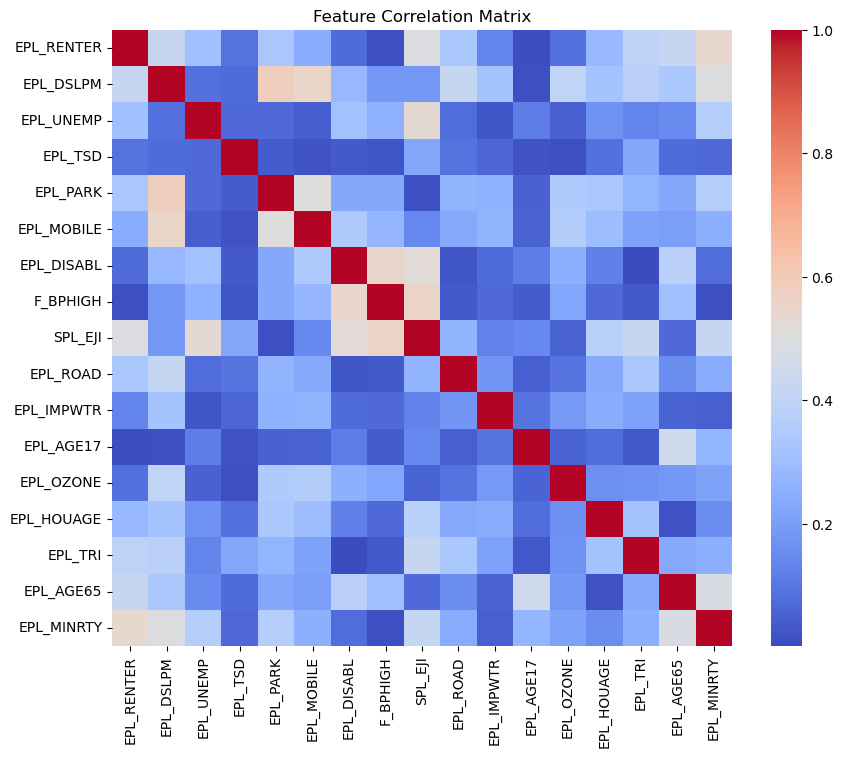

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

****************

KMEANS

In [12]:
df.shape

(72333, 17)

In [15]:
df = df.dropna()

In [16]:
df.shape

(72333, 17)

In [17]:
X = df

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Elbow

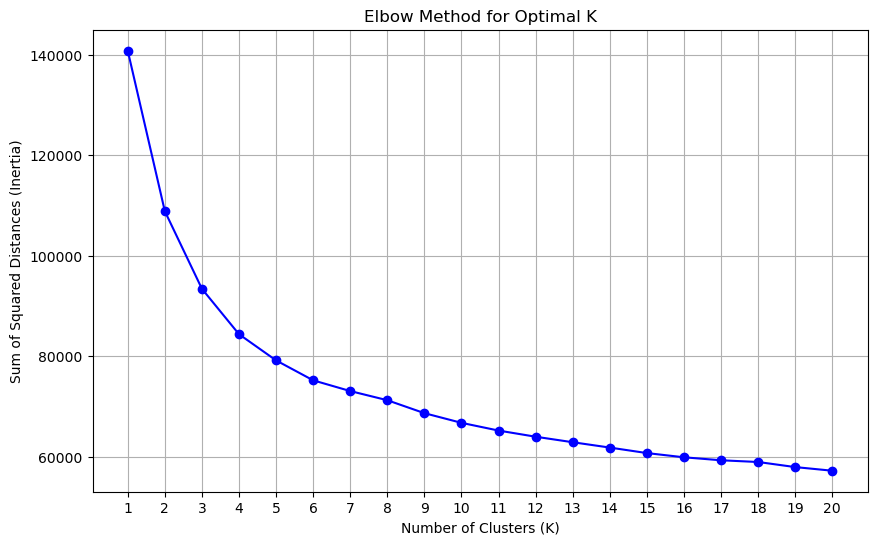

In [19]:
X = df

# List to store sum of squared distances (inertia) for each k
inertia = []

# Perform K-Means clustering for k values from 1 to 20
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)  # Inertia is the sum of squared distances

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()

#### silhouette

100%|██████████████████████████████████████████████████████████████████████████████████████| 19/19 [18:47<00:00, 59.32s/it]


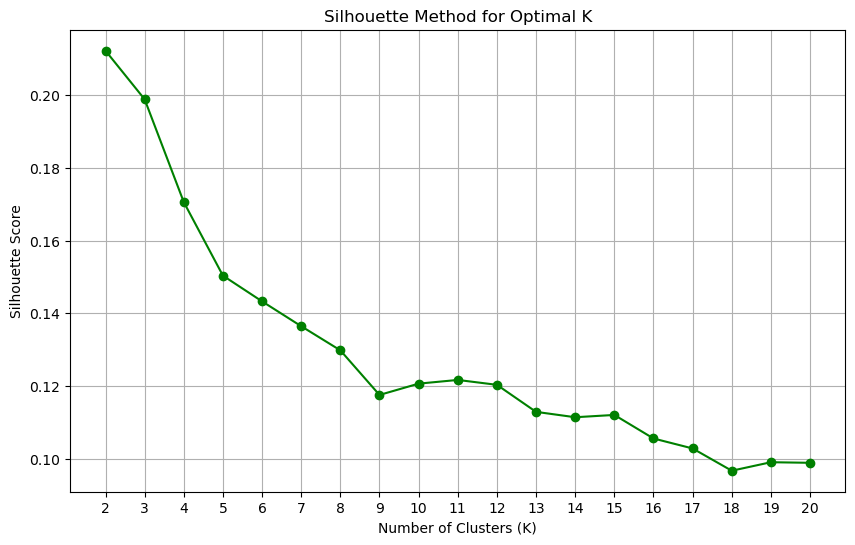

In [22]:
# List to store silhouette scores
silhouette_scores = []

# Perform K-Means clustering for k values from 2 to 20
for k in tqdm(range(2, 21)):  # Silhouette score is not defined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    score = silhouette_score(X, labels)  # Calculate silhouette score
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 21), silhouette_scores, marker='o', linestyle='-', color='g')
plt.title('Silhouette Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 21))
plt.grid(True)
plt.show()

In [23]:
silhouette_scores

[0.21222702557530848,
 0.19885917384123983,
 0.17057798266909885,
 0.15035186089836508,
 0.143276843057355,
 0.13643956728105186,
 0.12980195508820713,
 0.11753021075257238,
 0.12064126483782207,
 0.12165835921782886,
 0.12031465662911567,
 0.11287541193083177,
 0.1113981558711476,
 0.11203023469505406,
 0.10555084463205909,
 0.10280899631186083,
 0.09668430992141513,
 0.099021489386094,
 0.0988629961286169]

In [24]:
X_train, X_test = train_test_split(X_scaled, test_size=0.3, random_state=42)

In [25]:
optimal_k = 5  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_train)
test_clusters = kmeans.predict(X_test)

In [ ]:
#df_clean['COUNTY'] = test_df['COUNTY'].iloc[df_clean.index].values
#df_clean['COUNTYFP'] = test_df['COUNTYFP'].iloc[df_clean.index].values

In [ ]:
#df_clean

## Finding optinal neighnors

In [28]:
results = []
for k in tqdm(range(1, 11)):  # Test k from 1 to 20
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, kmeans.labels_)
    predicted_clusters = knn.predict(X_test)
    misclassification_rate = 1 - accuracy_score(test_clusters, predicted_clusters)
    results.append((k, misclassification_rate))

100%|██████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:06<00:00,  1.51it/s]


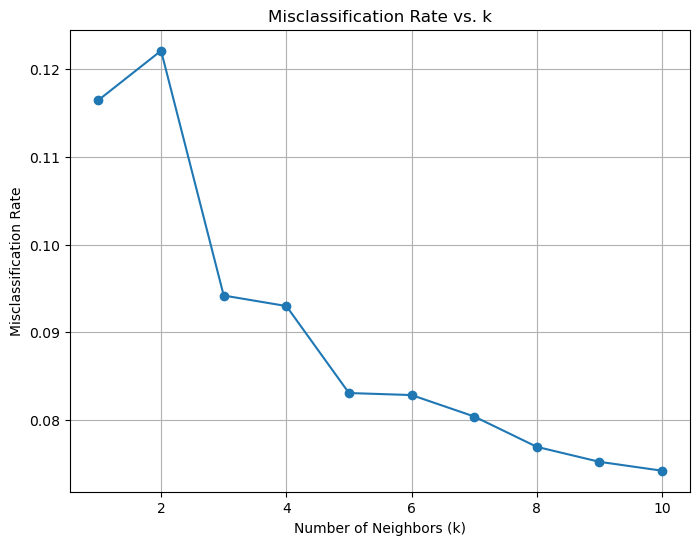

In [29]:
ks, rates = zip(*results)

plt.figure(figsize=(8, 6))
plt.plot(ks, rates, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Misclassification Rate")
plt.title("Misclassification Rate vs. k")
plt.grid(True)
plt.show()

## This is for the  final run with optimal neighbors 

In [30]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, kmeans.labels_) 
predicted_clusters = knn.predict(X_test)

In [31]:
misclassification_rate = 1 - accuracy_score(test_clusters, predicted_clusters)
print(f"Misclassification Rate: {misclassification_rate}")

Misclassification Rate: 0.07423963133640554


## Now rerun kmeans on full data since it is validated

In [32]:
optimal_k = 5 
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [33]:
#list(reduced_df['Cluster'].unique())

In [34]:
#df_clean['COUNTYFP'] = test_df['COUNTYFP'].iloc[df_clean.index].values

## PCA on good data

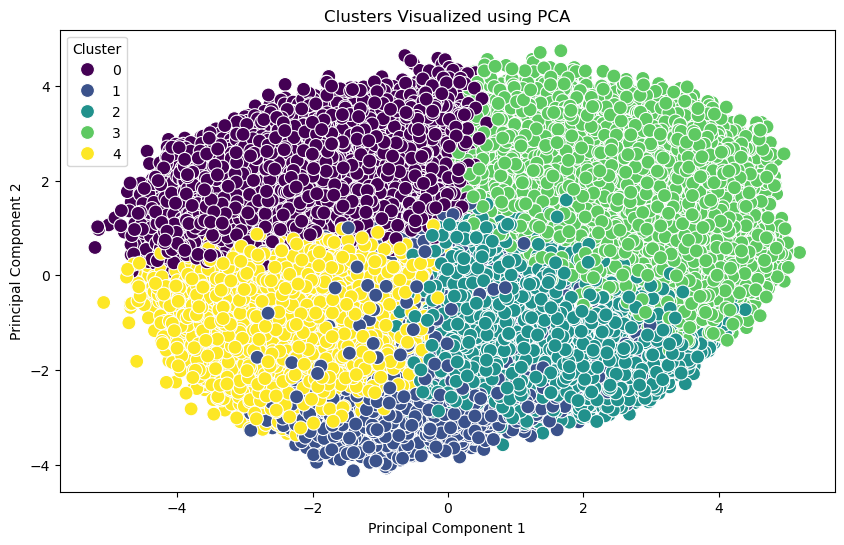

In [36]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=df['Cluster'],
    palette='viridis',
    s=100
)
plt.title('Clusters Visualized using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
pca = PCA(n_components=0.9)  # Retain components that explain 90% of variance
X_pca = pca.fit_transform(X_scaled)
print(f"Number of Components: {pca.n_components_}")

In [ ]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by Principal Components: {explained_variance}")
print(f"Total Variance Explained: {explained_variance.sum()}")

## Feature importance Plots

## Feature Importance with RF

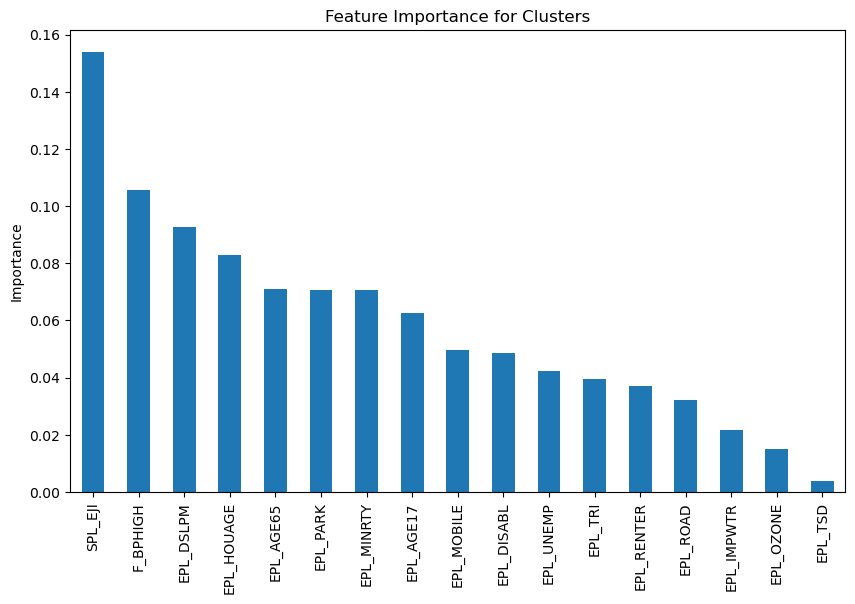

In [37]:
#X = df_clean.drop(columns=['Cluster','COUNTYFP'])  # Features (original, not scaled)
X = df.drop(columns=['Cluster'])
y = df['Cluster']  # Cluster labels from K-means

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X, y)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)

# Sort and visualize
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), title='Feature Importance for Clusters')
plt.ylabel('Importance')
plt.show()

  0%|                                                                                                | 0/5 [00:00<?, ?it/s]

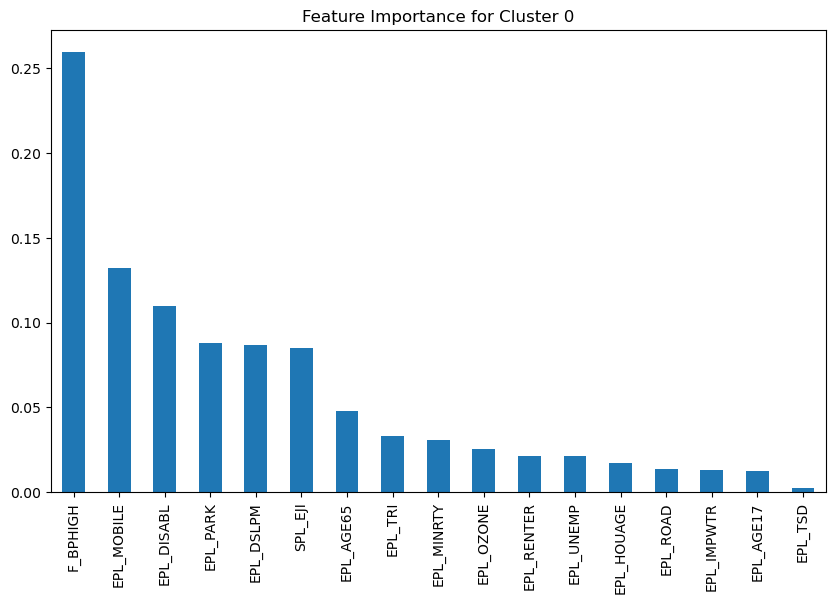

 20%|█████████████████▌                                                                      | 1/5 [00:10<00:40, 10.14s/it]

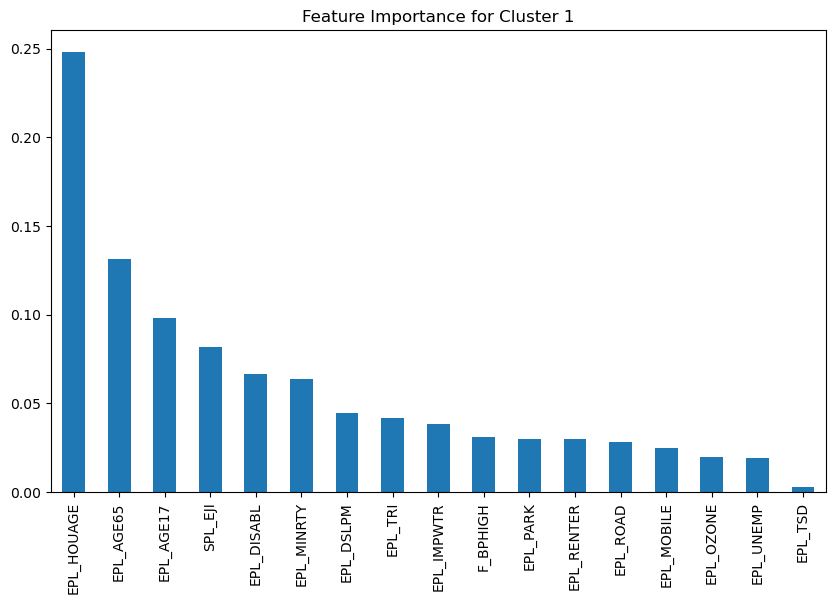

 40%|███████████████████████████████████▏                                                    | 2/5 [00:23<00:35, 11.98s/it]

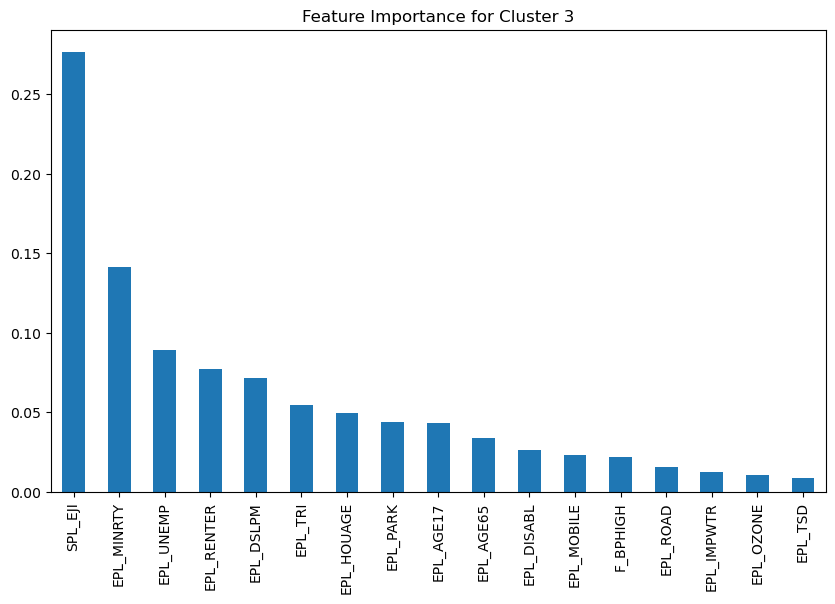

 60%|████████████████████████████████████████████████████▊                                   | 3/5 [00:38<00:26, 13.29s/it]

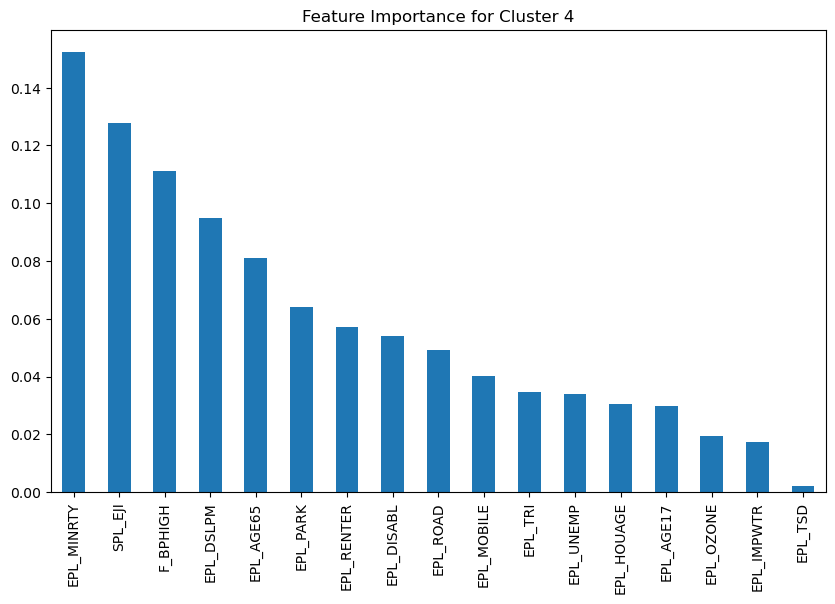

 80%|██████████████████████████████████████████████████████████████████████▍                 | 4/5 [00:53<00:14, 14.16s/it]

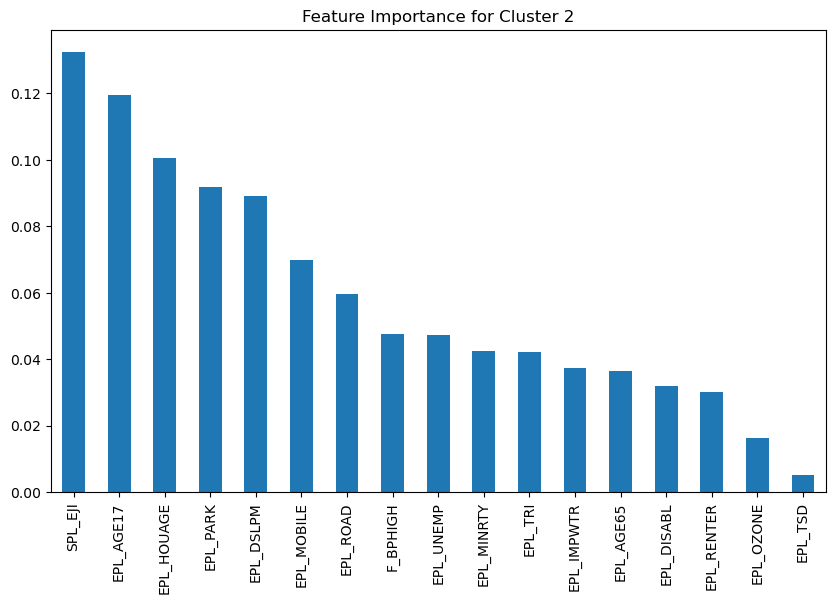

100%|████████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:08<00:00, 13.70s/it]


In [38]:
for cluster_id in tqdm(df['Cluster'].unique()):
    # Create binary target: 1 for current cluster, 0 for others
    y_binary = (df['Cluster'] == cluster_id).astype(int)

    # Train a Random Forest model
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X, y_binary)

    # Get feature importance
    feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
    feature_importances.sort_values(ascending=False).plot(
        kind='bar', title=f'Feature Importance for Cluster {cluster_id}', figsize=(10, 6)
    )
    plt.show()

In [ ]:
len(list(reduced_df.columns))

## Geocoding -- dont need this anymore

In [ ]:
# import pandas as pd
# from geopy.geocoders import Nominatim
# import folium
# import time
# from tqdm import tqdm

# # Assuming df_clean is the dataframe you already have with 'COUNTY' and 'Cluster'

# # Initialize geocoder
# geolocator = Nominatim(user_agent="county_geocoder")

# # Function to geocode county names and get lat/lon with retries
# def geocode_county(county, retries=3, delay=2):
#     for attempt in range(retries):
#         try:
#             location = geolocator.geocode(f"{county}, USA", timeout=10)  # Increased timeout
#             if location:
#                 return location.latitude, location.longitude
#             else:
#                 return None, None
#         except Exception as e:
#             print(f"Error geocoding {county} on attempt {attempt + 1}: {e}")
#             if attempt < retries - 1:
#                 time.sleep(delay)  # Wait before retrying
#             else:
#                 return None, None  # After all retries, return None if failed

# # Create a lookup table for unique counties
# unique_counties = df_clean['COUNTY'].unique()
# county_coords = {}

# # Check if coordinates exist in the lookup table, otherwise call the geocoder
# for county in tqdm(unique_counties, desc="Geocoding unique counties"):
#     if county not in county_coords:
#         lat, lon = geocode_county(county)
#         county_coords[county] = (lat, lon)

# # # Map the coordinates back to the dataframe
# df_clean['Latitude'] = df_clean['COUNTY'].map(lambda x: county_coords[x][0])
# df_clean['Longitude'] = df_clean['COUNTY'].map(lambda x: county_coords[x][1])

# # # Filter out rows with missing coordinates
# df_clean = df_clean.dropna(subset=['Latitude', 'Longitude'])

# # # Create a map centered around the first valid county
# # map


In [ ]:
df_clean

***

## Mapping 

In [ ]:

# Load shapefile
# shapefile_path = r"C:\Users\steph\Downloads\cb_2018_us_county_within_cd116_500k\cb_2018_us_county_within_cd116_500k.shp"  # Adjust to your filename
# counties = gpd.read_file(shapefile_path)

# Export to GeoJSON
geojson_path = r"C:\Users\steph\Downloads\d1c73f91dd9d175998ed166eb216994a-e89c35f308cee7e2e5a784e1d3afc5d449e9e4bb\d1c73f91dd9d175998ed166eb216994a-e89c35f308cee7e2e5a784e1d3afc5d449e9e4bb\counties.geojson"



counties.to_file(geojson_path, driver="GeoJSON")

print(f"GeoJSON file saved to {geojson_path}")

In [ ]:
len(list(test_df['COUNTYFP'].unique()))

In [ ]:
cluster_geojson

In [ ]:
# Load the GeoJSON file
geojson_path = r"C:/Users/steph/data_sci_masters/mining/data/counties.geojson"
counties_geo = gpd.read_file(geojson_path)

# Filter and aggregate data for Cluster 1
cluster_1_density = df_clean[df_clean['Cluster'] == 1].groupby('COUNTYFP').size().reset_index(name='Density')

In [ ]:
counties_geo['COUNTYFP'] = counties_geo['COUNTYFP'].str.lstrip('0')

# Verify the changes
counties_geo['COUNTYFP']

In [ ]:
# Ensure COUNTYFP is the same type in both DataFrame and GeoDataFrame
counties_geo['COUNTYFP'] = counties_geo['COUNTYFP'].astype(str)
cluster_1_density['COUNTYFP'] = cluster_1_density['COUNTYFP'].astype(str)

# Merge on COUNTYFP
merged = counties_geo.merge(cluster_1_density, on='COUNTYFP', how='left')

# Fill missing density values with 0
merged['Density'] = merged['Density'].fillna(0)


In [ ]:
merged

In [ ]:
# Ensure COUNTYFP is string type in both datasets
counties_geo['COUNTYFP'] = counties_geo['COUNTYFP'].astype(str)
df_clean['COUNTYFP'] = df_clean['COUNTYFP'].astype(str)

# Create a Folium map
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4, tiles='cartodbpositron')  # Center on the US

# Loop through each unique cluster and create a layer for it
clusters = df_clean['Cluster'].unique()
for cluster in clusters:
    # Filter data for the specific cluster
    cluster_data = df_clean[df_clean['Cluster'] == cluster].groupby('COUNTYFP').size().reset_index(name='Density')
    
    # Merge GeoDataFrame with cluster density data
    merged = counties_geo.merge(cluster_data, on='COUNTYFP', how='left')
    merged['Density'] = merged['Density'].fillna(0)  # Fill missing densities with 0

    # Create a FeatureGroup for the cluster
    feature_group = folium.FeatureGroup(name=f'Cluster {cluster}')
    
    # Add a Choropleth layer for this cluster
    choropleth = folium.Choropleth(
        geo_data=merged.to_json(),        # GeoJSON data
        data=cluster_data,               # Data for mapping
        columns=['COUNTYFP', 'Density'], # Columns: key and value
        key_on='feature.properties.COUNTYFP',  # Match GeoJSON COUNTYFP with data
        fill_color='Reds',               # Color scale
        fill_opacity=0.7,                # Transparency
        line_opacity=0.2,                # Border opacity
        legend_name=f'Density of Cluster {cluster}'
    )
    choropleth.add_to(m)  # Ensure Choropleth is added to the FeatureGroup

    # Add GeoJson tooltips for more info on hover
    folium.GeoJson(
        merged,
        style_function=lambda feature: {
            'fillColor': 'transparent',
            'color': 'black',
            'weight': 0.5
        },
        tooltip=folium.GeoJsonTooltip(
            fields=['COUNTYFP', 'Density'],
            aliases=['County Code:', f'Cluster {cluster} Density:'],
            localize=True
        )
    ).add_to(feature_group)

    # Add the feature group to the map
    feature_group.add_to(m)

# Add a LayerControl to toggle clusters on/off
folium.LayerControl(collapsed=False).add_to(m)

# Save the map to an HTML file
m.save('clusters_density_map.html')

# Display the map in a Jupyter notebook (optional)
m